# <b> Logistic Regression </b>
___

<b> Table of Content: </b>
<br> [Pipeline_1](#8000)
<br> [Pipeline 2](#8010)
<br> [Pipeline 3](#8020)

Loading Modules and Datasets

In [139]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# import oversampling and undersampling packages
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler 

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report 

# Cross Validation packages
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# import required modules for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# import module for gridsearch (to find optimal hyper-parameters)
from sklearn.model_selection import GridSearchCV

# import module (to test execution time of a codeblock to run)
import time

<a id = "8000"> <h2> Pipeline 1 </h2> </a>
___

In [140]:
# read csv file to a pandas dataframe
df_pipeline1 = pd.read_csv("pipeline_1.csv")

In [141]:
# show all columns in dataset
print('There are', len(df_pipeline1.columns)-1, 'features, and the target `Revenue` for pipeline 1:')
list(df_pipeline1.columns)

There are 22 features, and the target `Revenue` for pipeline 1:


['Q4',
 'VisitorType_New_Visitor',
 'Q3',
 'TrafficType_2',
 'TrafficType_8',
 'TrafficType_3',
 'PageValues_iqr_yj_zscore',
 'Q1',
 'TrafficType_13',
 'ExitRates_iqr_yj_zscore',
 'OperatingSystems_3',
 'Administrative_Duration_iqr_yj_zscore',
 'TrafficType_1',
 'SpecialDay_0.8',
 'Month_Feb',
 'Browser_6',
 'SpecialDay_0.4',
 'TrafficType_20',
 'Informational_Duration_pp_iqr_yj_zscore',
 'Browser_12',
 'OperatingSystems_7',
 'TrafficType_16',
 'Revenue']

> <b> Declare Features and Target

In [142]:
# Define Features and Target variables
X = df_pipeline1.iloc[:, :-1] # Features is all columns in the dataframe except the last column
Y = df_pipeline1.iloc[:, -1] # Target is the last column in the dataframe: 'Revenue'

> <b> Split the data

In [143]:
# Split dataset into training set and test set 
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=2019) 

> <b> Model Development and Prediction

In [144]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

# predict (y_hat) - use trained model to predict test data
y_pred=logreg.predict(X_test)

> <b> Model Evaluation Using Confusion Matrix

In [145]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[2942,  189],
       [ 240,  328]])

> <b> Vizualizing Confusion Matrix Using Heatmap

In [146]:
%matplotlib inline
plt.style.use('ggplot')

Text(0.5,257.44,'Predicted label')

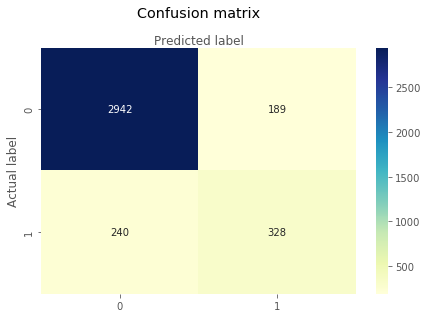

In [147]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

> <b> Confusion Matrix Evaluation

In [184]:
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#print("Precision:",metrics.precision_score(y_test, y_pred))
#print("Recall:",metrics.recall_score(y_test, y_pred))

In [185]:
# print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92      3131
           1       0.55      0.78      0.64       568

    accuracy                           0.87      3699
   macro avg       0.75      0.83      0.78      3699
weighted avg       0.89      0.87      0.88      3699



> <b> ROC Curve

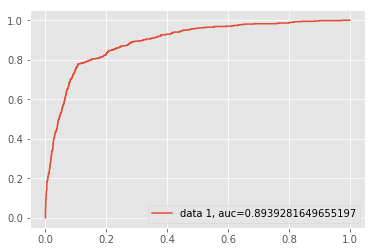

In [149]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

> <b> Oversampling applying SMOTE

In [182]:
sm = SMOTE(random_state = 2019) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train) 

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (14582, 22)
After OverSampling, the shape of train_y: (14582,) 

After OverSampling, counts of label '1': 7291
After OverSampling, counts of label '0': 7291


/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [183]:
logreg1 = LogisticRegression(dual=optimal_dual, 
                            max_iter=optimal_max_iter, 
                            C=optimal_C, 
                            penalty=optimal_penalty, 
                            fit_intercept=optimal_fit_intercept, 
                            solver=optimal_solver, 
                            multi_class=optimal_multi_class)

logreg1.fit(X_train_res, y_train_res)
y_pred = logreg1.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92      3131
           1       0.55      0.78      0.64       568

    accuracy                           0.87      3699
   macro avg       0.75      0.83      0.78      3699
weighted avg       0.89      0.87      0.88      3699



> <b> Take-away: </b>
* The oversampling decreased the weighted avg f1-score from 89% to 88%
* The oversampling decreased the accuracy from 88% to 87%

> <b> Cross Validation Using KFold </b>
<br> For more information on the topic, please click the following [link](https://stackabuse.com/cross-validation-and-grid-search-for-model-selection-in-python/).
<br> The details of the package are noted [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html).

In [151]:
# Build the k-fold cross-validator
k_fold_split = 3
kfold = KFold(n_splits=k_fold_split, random_state=2019, shuffle=True)
result = cross_val_score(estimator=logreg, X_train_res, Y, cv=kfold, scoring='accuracy')

print('--------------------------------------------------------------------------')
print('All the accuracy results:')
print('--------------------------------------------------------------------------')
print(result, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the accuracy results:')
print('--------------------------------------------------------------------------')
print(round(result.mean(), 4), '\n')

print('--------------------------------------------------------------------------')
print('Conclusion: the average of the accuracy changed after applying Kfold:')
print('--------------------------------------------------------------------------')
print('from:')
print(round(metrics.accuracy_score(y_test, y_pred), 5))
print('to:')
print(round(result.mean(), 5))
print('This is because we only use: {0:0.2f}% of our dataset to train the model!'.format(((k_fold_split-1)/k_fold_split)*100))

--------------------------------------------------------------------------
All the accuracy results:
--------------------------------------------------------------------------
[0.88564477 0.89586375 0.88759124] 

--------------------------------------------------------------------------
Average of all the accuracy results:
--------------------------------------------------------------------------
0.8897 

--------------------------------------------------------------------------
Conclusion: the average of the accuracy changed after applying Kfold:
--------------------------------------------------------------------------
from:
0.88402
to:
0.8897
This is because we only use: 66.67% of our dataset to train the model!


> <b> Gridsearch for the optimal hyper-parameters </b>
<br> To see the hyper-parameters of the Logistic Regression model, please refer to the following [link](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

_Note:_ The optimal hyper-parameter for: 'max_iter' was already found in pipeline 1 for RFE Feature selection using Logistic Regression, it was 53.

In [177]:
# Set the hyper-parameter grid
penalty = ['l1', 'l2']
dual=[True, False]
# syntax: numpy.logspace(start, stop, num=50, endpoint=True, base=10.0, dtype=None, axis=0) => Return numbers spaced evenly on a log scale.
C = np.logspace(-4, 4, 50)
fit_intercept=[True, False]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
max_iter=[53, 100]
multi_class = ['auto', 'ovr', 'multinomial']

param_grid = dict(penalty=penalty, 
                  dual=dual,max_iter=max_iter, 
                  C=C, 
                  fit_intercept=fit_intercept, 
                  solver=solver, 
                  multi_class=multi_class)

In [178]:
# set the start time
start = time.time()

# define the model
lr = LogisticRegression()

# Create a grid search object
grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv = 3, n_jobs=-1)

# Fit the grid search (Fitting your model to the training data)
grid_result = grid.fit(X, Y)

# define each optimal parameter as a new variable
optimal_dual = grid.best_estimator_.get_params()['dual']
optimal_max_iter = grid.best_estimator_.get_params()['max_iter']
optimal_C = grid.best_estimator_.get_params()['C']
optimal_penalty = grid.best_estimator_.get_params()['penalty']
optimal_fit_intercept = grid.best_estimator_.get_params()['fit_intercept']
optimal_solver = grid.best_estimator_.get_params()['solver']
optimal_multi_class = grid.best_estimator_.get_params()['multi_class']

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# get the time it takes for the gridsearch to run
# source: https://blog.softhints.com/python-test-performance-and-measure-time-elapsed-in-seconds/
# set the end time
end = time.time()

# get the elapsed execution time
execution_time = end - start
print("--- Execution time: ---")
print ('--- %0.3fms. --- ' % ( execution_time*1000.))
print("--- %s seconds ---" % (execution_time))
print("--- %s minutes ---" % (execution_time/60))

Best: 0.878345 using {'C': 0.0062505519252739694, 'dual': False, 'fit_intercept': True, 'max_iter': 53, 'penalty': 'l2', 'solver': 'liblinear'}
--- Execution time: ---
--- 174304.646ms. --- 
--- 174.30464577674866 seconds ---
--- 2.9050774296124775 minutes ---


> <b> Applying the optimal hyper-parameters to the model

In [181]:
# apply the optimal hyper-parameters to the Logistic Regression Model
logreg = LogisticRegression(dual=optimal_dual, 
                            max_iter=optimal_max_iter, 
                            C=optimal_C, 
                            penalty=optimal_penalty, 
                            fit_intercept=optimal_fit_intercept, 
                            solver=optimal_solver, 
                            multi_class=optimal_multi_class)

# fit the model with data
logreg.fit(X_train,y_train)

# predict 
y_pred=logreg.predict(X_test)

# print out the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      3131
           1       0.62      0.65      0.63       568

    accuracy                           0.88      3699
   macro avg       0.78      0.79      0.78      3699
weighted avg       0.89      0.88      0.89      3699



> <b> Take-away: </b>
* The optimal hyper-parameters increased the weighted avg f1-score from 88% to 89%

<a id = "8010"> <h2> Pipeline 2 </h2> </a>
___

In [48]:
# read csv file to a pandas dataframe
df_pipeline2 = pd.read_csv("pipeline_2.csv")

In [49]:
# show all columns in dataset
print('There are', len(df_pipeline2.columns)-1, 'features, and the target `Revenue` for pipeline 2:')
list(df_pipeline2.columns)

There are 21 features, and the target `Revenue` for pipeline 2:


['TrafficType_15',
 'Month_Nov',
 'Administrative_Duration_mm_yj_stdev',
 'VisitorType_New_Visitor',
 'Informational_mm_yj_stdev',
 'TrafficType_2',
 'TrafficType_3',
 'ProductRelated_mm_yj_stdev',
 'PageValues_mm_yj_stdev',
 'Month_May',
 'TrafficType_13',
 'OperatingSystems_3',
 'TrafficType_1',
 'add_exit_bounce_rates_mm_yj_stdev',
 'Month_Mar',
 'TrafficType_18',
 'TrafficType_8',
 'SpecialDay_0.8',
 'Month_Feb',
 'TrafficType_12',
 'Browser_12',
 'Revenue']

> Declare Features and Target

In [50]:
# Define Features and Target variables
X = df_pipeline2.iloc[:, :-1] # Features is all columns in the dataframe except the last column
Y = df_pipeline2.iloc[:, -1] # Target is the last column in the dataframe: 'Revenue'

> Split the data

In [51]:
# Split dataset into training set and test set 
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=2019) 

> Model Development and Prediction

In [52]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter=100)

# fit the model with data
logreg.fit(X_train,y_train)

# predict (y_hat) - use trained model to predict test data
y_pred=logreg.predict(X_test)

> Model Evaluation Using Confusion Matrix

In [53]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[3129,    2],
       [ 562,    6]])

> Vizualizing Confusion Matrix Using Heatmap

In [54]:
%matplotlib inline
plt.style.use('ggplot')

Text(0.5,257.44,'Predicted label')

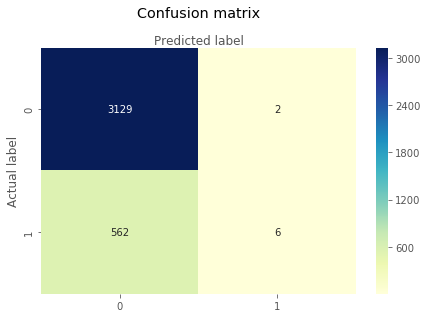

In [55]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

> Confusion Matrix Evaluation

In [56]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8475263584752636
Precision: 0.75
Recall: 0.01056338028169014


> ROC Curve

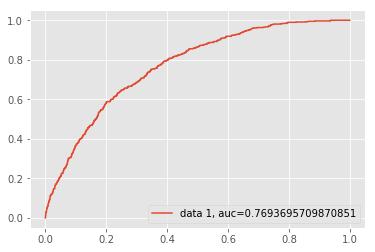

In [57]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [58]:
target_names = ['0', '1']

# print the classification report
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      3131
           1       0.75      0.01      0.02       568

    accuracy                           0.85      3699
   macro avg       0.80      0.50      0.47      3699
weighted avg       0.83      0.85      0.78      3699



<a id = "8020"> <h2> Pipeline 3 </h2> </a>
___

In [59]:
# read csv file to a pandas dataframe
df_pipeline3 = pd.read_csv("pipeline_3.csv")

In [60]:
# show all columns in dataset
print('There are', len(df_pipeline3.columns)-1, 'features, and the target `Revenue` for pipeline 3:')
list(df_pipeline3.columns)[:]

There are 23 features, and the target `Revenue` for pipeline 3:


['Administrative_yj_stdev_zscore',
 'Month_Nov',
 'VisitorType_New_Visitor',
 'TrafficType_2',
 'Month_May',
 'TrafficType_3',
 'add_exit_bounce_rates_yj_stdev_zscore',
 'TrafficType_13',
 'PageValues_yj_stdev_zscore',
 'OperatingSystems_3',
 'TrafficType_1',
 'Month_Mar',
 'TrafficType_8',
 'SpecialDay_0.8',
 'Month_Feb',
 'Month_Dec',
 'SpecialDay_0.4',
 'TrafficType_20',
 'Month_Oct',
 'Region_1',
 'Browser_12',
 'OperatingSystems_7',
 'TrafficType_16',
 'Revenue']

> Declare Features and Target

In [61]:
# Define Features and Target variables
X = df_pipeline3.iloc[:, :-1] # Features is all columns in the dataframe except the last column
Y = df_pipeline3.iloc[:, -1] # Target is the last column in the dataframe: 'Revenue'

> Split the data

In [62]:
# Split dataset into training set and test set 
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=2019) 

> Model Development and Prediction

In [63]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter=100)

# fit the model with data
logreg.fit(X_train,y_train)

# predict (y_hat) - use trained model to predict test data
y_pred=logreg.predict(X_test)

> Model Evaluation Using Confusion Matrix

In [64]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[2962,  169],
       [ 240,  328]])

> Vizualizing Confusion Matrix Using Heatmap

In [65]:
%matplotlib inline
plt.style.use('ggplot')

Text(0.5,257.44,'Predicted label')

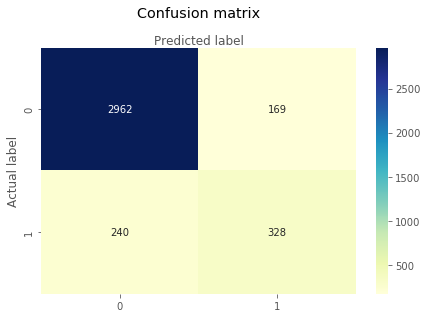

In [66]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

> Confusion Matrix Evaluation

In [67]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8894295755609625
Precision: 0.6599597585513078
Recall: 0.5774647887323944


In [69]:
target_names = ['0', '1']

# print the classification report
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      3131
           1       0.66      0.58      0.62       568

    accuracy                           0.89      3699
   macro avg       0.79      0.76      0.78      3699
weighted avg       0.88      0.89      0.89      3699



> ROC Curve

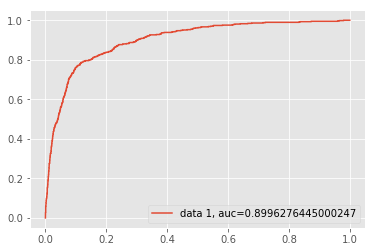

In [68]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()